# Кластеризация qRS комплексов в ЭКГ

## Общий вид цикла

<img src="./SinusRhythmLabels.png">

## Экстрасистолы
Пример:

<img src="./Ventricular-extrasystole-ECG.jpg">

# Задание

Используя алгоритмы кластеризации разделить qRS комплесы ЭКГ на группы, схожие по форме.
Данные представлены в файлах:
* ecg200_samples.csv
* ecg208_samples.csv
* ecg231_samples.csv

Разметка комплексов представлена в файлах:
* ecg200_labels.csv
* ecg208 - разметки нет
* ecg231_labels.csv

Модель строится отдельно для каждого файла *samples.csv*

# Шаг 1 - Загрузка данных

см https://docs.scipy.org/doc/numpy/reference/generated/numpy.loadtxt.html

In [38]:
import pandas

ecg_200_data = pandas.read_csv('ecg_data/ecg200_samples.csv', sep='\t', header=None)
ecg_208_data = pandas.read_csv('ecg_data/ecg208_samples.csv', sep='\t', header=None)
ecg_231_data = pandas.read_csv('ecg_data/ecg231_samples.csv', sep='\t', header=None)

### Шаг 1.1(Опционально) - Подготовка данных (нормализация)

array / max(array), array - matrix row

# Шаг 2 - Загрузка разметки

In [39]:
ecg_200_labels = pandas.read_csv('ecg_data/ecg200_labels.csv', sep='\t', header=None)
ecg_231_labels = pandas.read_csv('ecg_data/ecg231_labels.csv', sep='\t', header=None)

def to_zeros(labels, symbol):
    labels_zeros = []
    for index, row in labels.iterrows():
        if (row[0] == symbol):
            labels_zeros.append(0)
        else:
            labels_zeros.append(1)
    return labels_zeros

def to_list(one_column_data_frame):
    rez = []
    for index, row in one_column_data_frame.iterrows():
        rez.append(row[0])
    return rez

# ecg_200_labels

# Шаг 3 - Кластеризация комплексов

см: 
* http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
* http://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html
* http://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html

In [87]:
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN

kmeans_00 = KMeans(n_clusters=2, random_state=0).fit(ecg_200_data)
kmeans_08 = KMeans(n_clusters=2, random_state=0).fit(ecg_208_data)
kmeans_31 = KMeans(n_clusters=2, random_state=0).fit(ecg_231_data)

agglo_clust_00 = AgglomerativeClustering(n_clusters=2).fit(ecg_200_data)
agglo_clust_08 = AgglomerativeClustering(n_clusters=2).fit(ecg_208_data)
agglo_clust_31 = AgglomerativeClustering(n_clusters=2).fit(ecg_231_data)

dbscan_00 = DBSCAN(eps=0.3, min_samples=10).fit(ecg_200_data)
dbscan_08 = DBSCAN(eps=0.3, min_samples=10).fit(ecg_208_data)
dbscan_31 = DBSCAN(eps=0.3, min_samples=10).fit(ecg_231_data)

# Шаг 4 - Визуализация полученного разбиения:

In [170]:
import matplotlib.pyplot as plt
import numpy as np

def labels_to_dict(lables):
    rez = {}
    unique_labels = list(set(lables.tolist()))
    for i in range(0, len(unique_labels)):
        rez[unique_labels[i]] = i
    return rez

def printEcg(data, title):
    line_count = data.shape[0]
    row_count = data.shape[1]
    
    x = np.arange(0, row_count)

    for i in np.arange(0, line_count):
        plt.plot(x, data.iloc[i])
    plt.title(title)    
    
def print_ecgs(datas, titles):
    plt.figure(figsize=(30, 5))
    for i in range(0, len(datas)):
        plt.subplot(1, 3, i+1)
        printEcg(datas[i], titles[i])
    plt.show()
    
def print_predict(algo, data, title, algo_name):
    line_count = data.shape[0]
    row_count = data.shape[1]
    
    x = np.arange(0, row_count)
    y = algo.labels_
    lables_dict = labels_to_dict(y)
    # сгенерируем цвета для dbscan
    colors = []
    if (algo_name == 'dbscan'):
        for i in range(0, len(lables_dict)):
            colors.append(np.random.rand(3,))
    n_clusters_ = len(set(y)) - (1 if -1 in y else 0)
    for i in np.arange(0, line_count):
        if (algo_name == 'dbscan'):
            if (y[i] == -1):
                plt.plot(x, data.iloc[i], c='y') # шум в dbscan будет желтым
            else:
                plt.plot(x, data.iloc[i], c=colors[lables_dict[y[i]]])
        else:
            if (y[i] == 0):
                plt.plot(x, data.iloc[i], c='c')
            else:
                plt.plot(x, data.iloc[i], c='k')
    plt.title(title + '_predict' + '_' + algo_name + '_clusters_' + str(n_clusters_))
    
def print_predicts(algos, datas, titles, algo_name):
    plt.figure(figsize=(30, 5))
    for i in range(0, len(datas)):
        plt.subplot(1, 3, i+1)
        print_predict(algos[i], datas[i], titles[i], algo_name)
    plt.show()

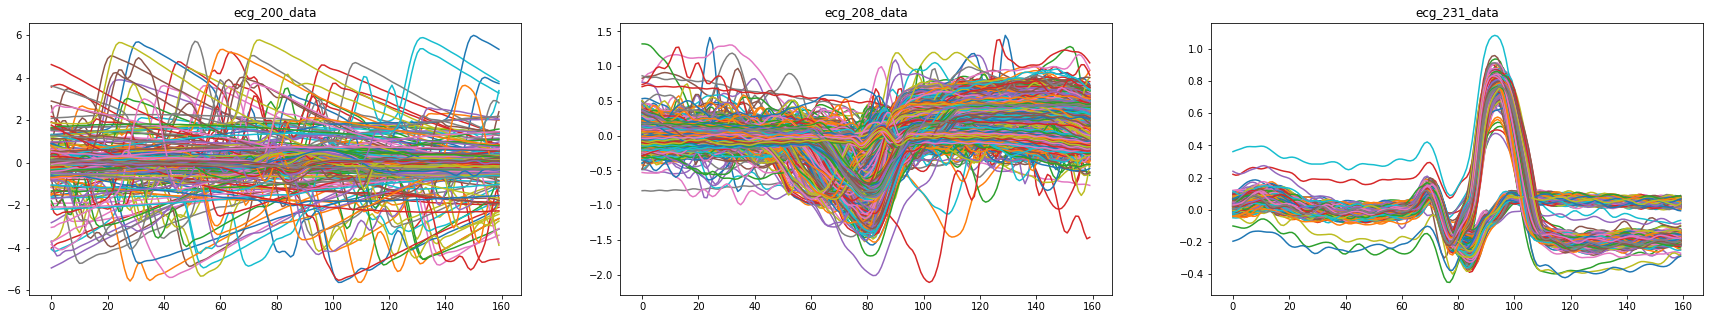

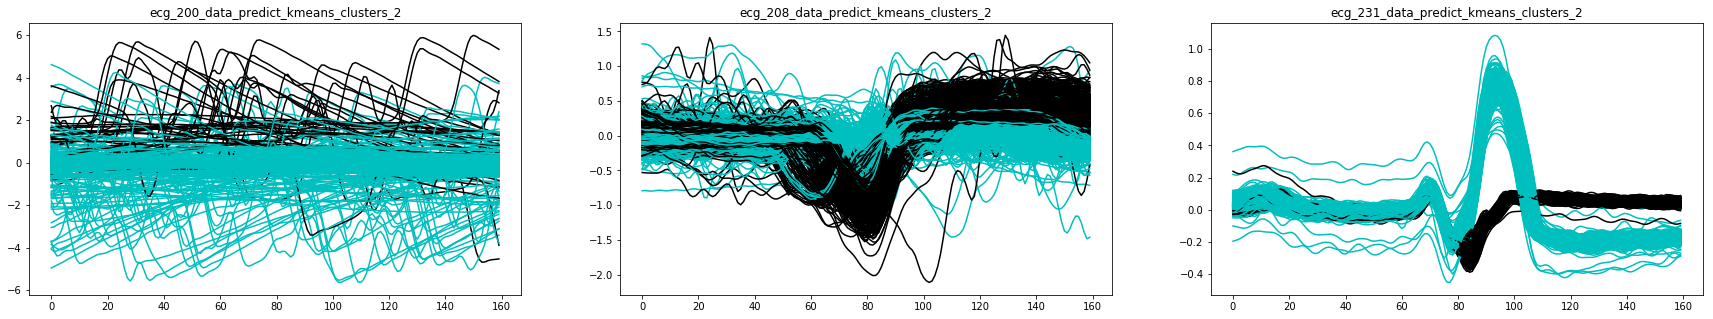

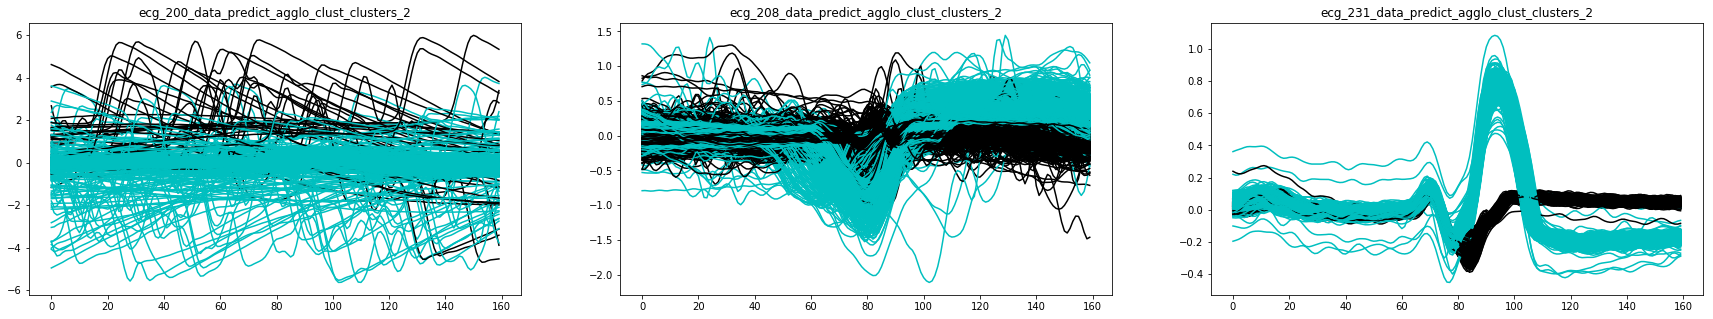

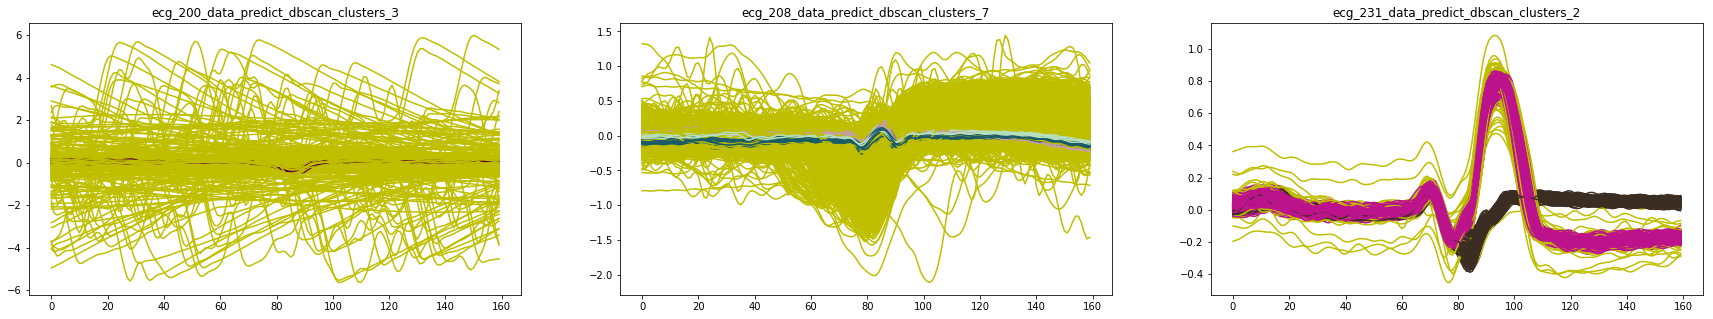

In [169]:
print_ecgs(
    [ecg_200_data, ecg_208_data, ecg_231_data], 
    ['ecg_200_data', 'ecg_208_data', 'ecg_231_data']
)
# формат имени: [имя данных]_predict_[имя алгоритма]_clusters_[количество кластеров в разбиении]
print_predicts(
    [kmeans_00, kmeans_08, kmeans_31], 
    [ecg_200_data, ecg_208_data, ecg_231_data], 
    ['ecg_200_data', 'ecg_208_data', 'ecg_231_data'], 'kmeans'
)
print_predicts(
    [agglo_clust_00, agglo_clust_08, agglo_clust_31], 
    [ecg_200_data, ecg_208_data, ecg_231_data], 
    ['ecg_200_data', 'ecg_208_data', 'ecg_231_data'], 'agglo_clust'
)
print_predicts(
    [dbscan_00, dbscan_08, dbscan_31], 
    [ecg_200_data, ecg_208_data, ecg_231_data], 
    ['ecg_200_data', 'ecg_208_data', 'ecg_231_data'], 'dbscan'
)

# Шаг 5 - Оценка качества работы выбранных алгоритмов 

В записимости от исходных данных выбираем метрики.

см:
* http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html
* http://scikit-learn.org/stable/modules/generated/sklearn.metrics.homogeneity_score.html
* http://scikit-learn.org/stable/modules/generated/sklearn.metrics.completeness_score.html
* http://scikit-learn.org/stable/modules/generated/sklearn.metrics.v_measure_score.html

In [148]:
import pandas as pd 

def metrix_dict(data, kmeans, agglo_clust, dbscan, ecg_labels=None):
    def dict_for_algo(algo, data, ecg_labels):
        rez = {}
        labels = algo.labels_
        # Number of clusters in labels, ignoring noise if present.
        n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
        rez['estimate_clusters'] = n_clusters_
        rez['silhouette_avg'] = metrics.silhouette_score(data, labels)
        if (ecg_labels is not None):
            labels_true = to_list(ecg_labels)
            rez['homogeneity'] = metrics.homogeneity_score(labels_true, labels)
            rez['completeness'] = metrics.completeness_score(labels_true, labels) 
            rez['v_measure'] = metrics.v_measure_score(labels_true, labels) 
        return rez
    
    rez = {}
    rez['kmeans'] = dict_for_algo(kmeans, data, ecg_labels)
    rez['agglo_clust'] = dict_for_algo(agglo_clust, data, ecg_labels)
    rez['dbscan'] = dict_for_algo(dbscan, data, ecg_labels)
    return rez

metrix_00 = metrix_dict(ecg_200_data, kmeans_00, agglo_clust_00, dbscan_00, ecg_200_labels)
metrix_08 = metrix_dict(ecg_208_data, kmeans_08, agglo_clust_08, dbscan_08, None)
metrix_31 = metrix_dict(ecg_231_data, kmeans_31, agglo_clust_31, dbscan_31, ecg_231_labels)

df_00 = pd.DataFrame(data=metrix_00)
df_08 = pd.DataFrame(data=metrix_08)
df_31 = pd.DataFrame(data=metrix_31)

# silhouette_avg = [-1, 1]
# homogeneity = [0, 1]
# completeness = [0, 1]
# v_measure = [0, 1]

In [173]:
print('ecg_200_data')
df_00
# видим, что полохо разделили, так как homogeneity, completeness, v_measure - низкие
# но silhouette_avg достаточно высокий

ecg_200_data


,agglo_clust,dbscan,kmeans
completeness,0.002316,0.236014,0.002864
estimate_clusters,2.000000,3.000000,2.000000
homogeneity,0.000247,0.461978,0.000313
silhouette_avg,0.873699,0.018005,0.865029
v_measure,0.000447,0.312420,0.000565


In [172]:
print('ecg_208_data')
df_08
# dbscan разделил хуже всех - очень много шума

ecg_208_data


,agglo_clust,dbscan,kmeans
estimate_clusters,2.000000,7.000000,2.00000
silhouette_avg,0.573529,-0.320916,0.57909


In [171]:
print('ecg_231_data')
df_31
# хорошо разделили данные. Все показатели высокие.
# Их было легко разделить, даже при визуализации.
# agglo_clust и kmeans дали одинаковые результаты

ecg_231_data


,agglo_clust,dbscan,kmeans
completeness,0.989659,0.681596,0.989659
estimate_clusters,2.000000,2.000000,2.000000
homogeneity,0.991402,0.978976,0.991402
silhouette_avg,0.815674,0.461087,0.815674
v_measure,0.990530,0.803658,0.990530


# Шаг 6 - Подбор параметров для алгоритмов кластеризации
- число кластеров
- функция расстояния
- и т.д.

# Шаг 7 - Оценка окончательного скора, выводы

Estimated number of clusters: 3
Homogeneity: 0.953
Completeness: 0.883
V-measure: 0.917
Adjusted Rand Index: 0.952
Adjusted Mutual Information: 0.883
Silhouette Coefficient: 0.626


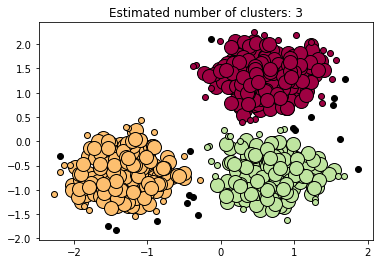

In [79]:
# print(__doc__)

import numpy as np

from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import StandardScaler


# #############################################################################
# Generate sample data
centers = [[1, 1], [-1, -1], [1, -1]]
X, labels_true = make_blobs(n_samples=750, centers=centers, cluster_std=0.4,
                            random_state=0)

X = StandardScaler().fit_transform(X)

# #############################################################################
# Compute DBSCAN
db = DBSCAN(eps=0.3, min_samples=10).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

print('Estimated number of clusters: %d' % n_clusters_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(labels_true, labels))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(labels_true, labels))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels))

# #############################################################################
# Plot result
import matplotlib.pyplot as plt

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

In [83]:
# #############################################################################
# Compute DBSCAN
db = DBSCAN(eps=0.3, min_samples=10).fit(ecg_231_data)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

labels_true = to_list(ecg_231_labels)

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

print('Estimated number of clusters: %d' % n_clusters_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(labels_true, labels))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(labels_true, labels))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(ecg_231_data, labels))

# #############################################################################
# Plot result
import matplotlib.pyplot as plt

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

Estimated number of clusters: 2
Homogeneity: 0.979
Completeness: 0.682
V-measure: 0.804
Adjusted Rand Index: 0.803
Adjusted Mutual Information: 0.681
Silhouette Coefficient: 0.461
